In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm, kurtosis,skew
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, optimize
import seaborn as sns
import waipy

%run ../funtion/Funciones.ipynb

# Exercicio 8
# Global Wavelet Spectrum

## Noise 80 series

In [2]:
nn = np.arange(6,14)
expo = np.zeros([len(nn)])

for i in range(len(nn)):
    expo[i] = 2**nn[i]

In [3]:
noise64 = np.zeros([int(expo[0]),10])
noise128 = np.zeros([int(expo[1]),10])
noise256 = np.zeros([int(expo[2]),10])
noise512 = np.zeros([int(expo[3]),10])
noise1024 = np.zeros([int(expo[4]),10])
noise2048 = np.zeros([int(expo[5]),10])
noise4096 = np.zeros([int(expo[6]),10])
noise8192 = np.zeros([int(expo[7]),10])

In [4]:
for t in range(10):
    a = grng1(64)
    b = grng1(128)
    c = grng1(256)
    d = grng1(512)
    e = grng1(1024)
    f = grng1(2048)
    g = grng1(4096)
    h = grng1(8192)
    
    noise64[:,t] = a[:,0]
    noise128[:,t] = b[:,0] 
    noise256[:,t] = c[:,0] 
    noise512[:,t] = d[:,0] 
    noise1024[:,t] = e[:,0] 
    noise2048[:,t] = f[:,0] 
    noise4096[:,t] = g[:,0] 
    noise8192[:,t] = h[:,0] 

In [5]:
noise64_norm,noise64_esta = Normalizar1(noise64)
noise128_norm,noise128_esta = Normalizar1(noise128)
noise256_norm,noise256_esta = Normalizar1(noise256)
noise512_norm,noise512_esta = Normalizar1(noise512)
noise1024_norm,noise1024_esta = Normalizar1(noise1024)
noise2048_norm,noise2048_esta = Normalizar1(noise2048)
noise4096_norm,noise4096_esta = Normalizar1(noise4096)
noise8192_norm,noise8192_esta = Normalizar1(noise8192)

In [6]:
noise = [noise64_esta,noise128_esta,noise256_esta,noise512_esta,noise1024_esta,\
          noise2048_esta,noise4096_esta,noise8192_esta]
frames_noise = pd.concat(noise,ignore_index=True)

frames_noise = frames_noise.drop(['Prom','Vari','Cor'],axis=1)

## ColorNoise 60 series

In [7]:
white_noise = np.zeros([8192,20])
pink_noise = np.zeros([8192,20])
red_noise = np.zeros([8192,20])

for t in range(20):
    white_noise[:,t] = powerlaw_psd_gaussian(0,8192)
    pink_noise[:,t] = powerlaw_psd_gaussian(1,8192)
    red_noise[:,t] = powerlaw_psd_gaussian(2,8192)

In [8]:
white_norm,white_esta = Normalizar1(white_noise)
pink_norm,pink_esta = Normalizar1(pink_noise)
red_norm,red_esta = Normalizar1(red_noise)

## PmNoise 60 series

In [9]:
endogeno1 = np.zeros([8192,10])
endogeno2 = np.zeros([8192,10])
endogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.32, 0.4)
    x2,y2 = pmodel (8192, 0.37, 0.4)
    x3,y3 = pmodel (8192, 0.42, 0.4)
    
    endogeno1[:,t] = y1[:]
    endogeno2[:,t] = y2[:]
    endogeno3[:,t] = y3[:]

In [10]:
exogeno1 = np.zeros([8192,10])
exogeno2 = np.zeros([8192,10])
exogeno3 = np.zeros([8192,10])

for t in range(10):
    
    y1,y2,y3 = 0,0,0
    x1,y1 = pmodel (8192, 0.18, 0.7)
    x2,y2 = pmodel (8192, 0.23, 0.7)
    x3,y3 = pmodel (8192, 0.28, 0.7)
    
    exogeno1[:,t] = y1[:]
    exogeno2[:,t] = y2[:]
    exogeno3[:,t] = y3[:]

In [11]:
endogeno1_norm,endogeno1_esta = Normalizar1(endogeno1)
endogeno2_norm,endogeno2_esta = Normalizar1(endogeno2)
endogeno3_norm,endogeno3_esta = Normalizar1(endogeno3)

exogeno1_norm,exogeno1_esta = Normalizar1(exogeno1)
exogeno2_norm,exogeno2_esta = Normalizar1(exogeno2)
exogeno3_norm,exogeno3_esta = Normalizar1(exogeno3)

## ChaosNoise 60 series

In [12]:
rho = np.linspace(3.81,4.0,30)
tau = 1.1
N = 511

logistica = np.zeros([N+1,30])

for t in range(30):
    
    xtemp = 0.001
    ytemp = 0.001
    
    x = [xtemp]
    y = [ytemp]
    
    for i in range(N):
        xtemp, ytemp = Logistic(rho[t],tau,xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    logistica[:,t] = x

In [13]:
a = np.linspace(1.35,1.40,30)
b = np.linspace(0.21,0.30,30)

N = 511

henon = np.zeros([N+1,30])

for t in range(30):

    xtemp = 0.1
    ytemp = 0.3

    x = [xtemp]
    y = [ytemp]

    for i in range(N):
        xtemp, ytemp = HenonMap(a[t],b[t],xtemp,ytemp)
        x.append( xtemp )
        y.append( ytemp )
        
    henon[:,t] = y

In [14]:
logistica_norm,logistica_esta = Normalizar1(logistica)
henon_norm,henon_esta = Normalizar1(henon)

## Global Wavelet Spectrum

## Noise 1024

512 512


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


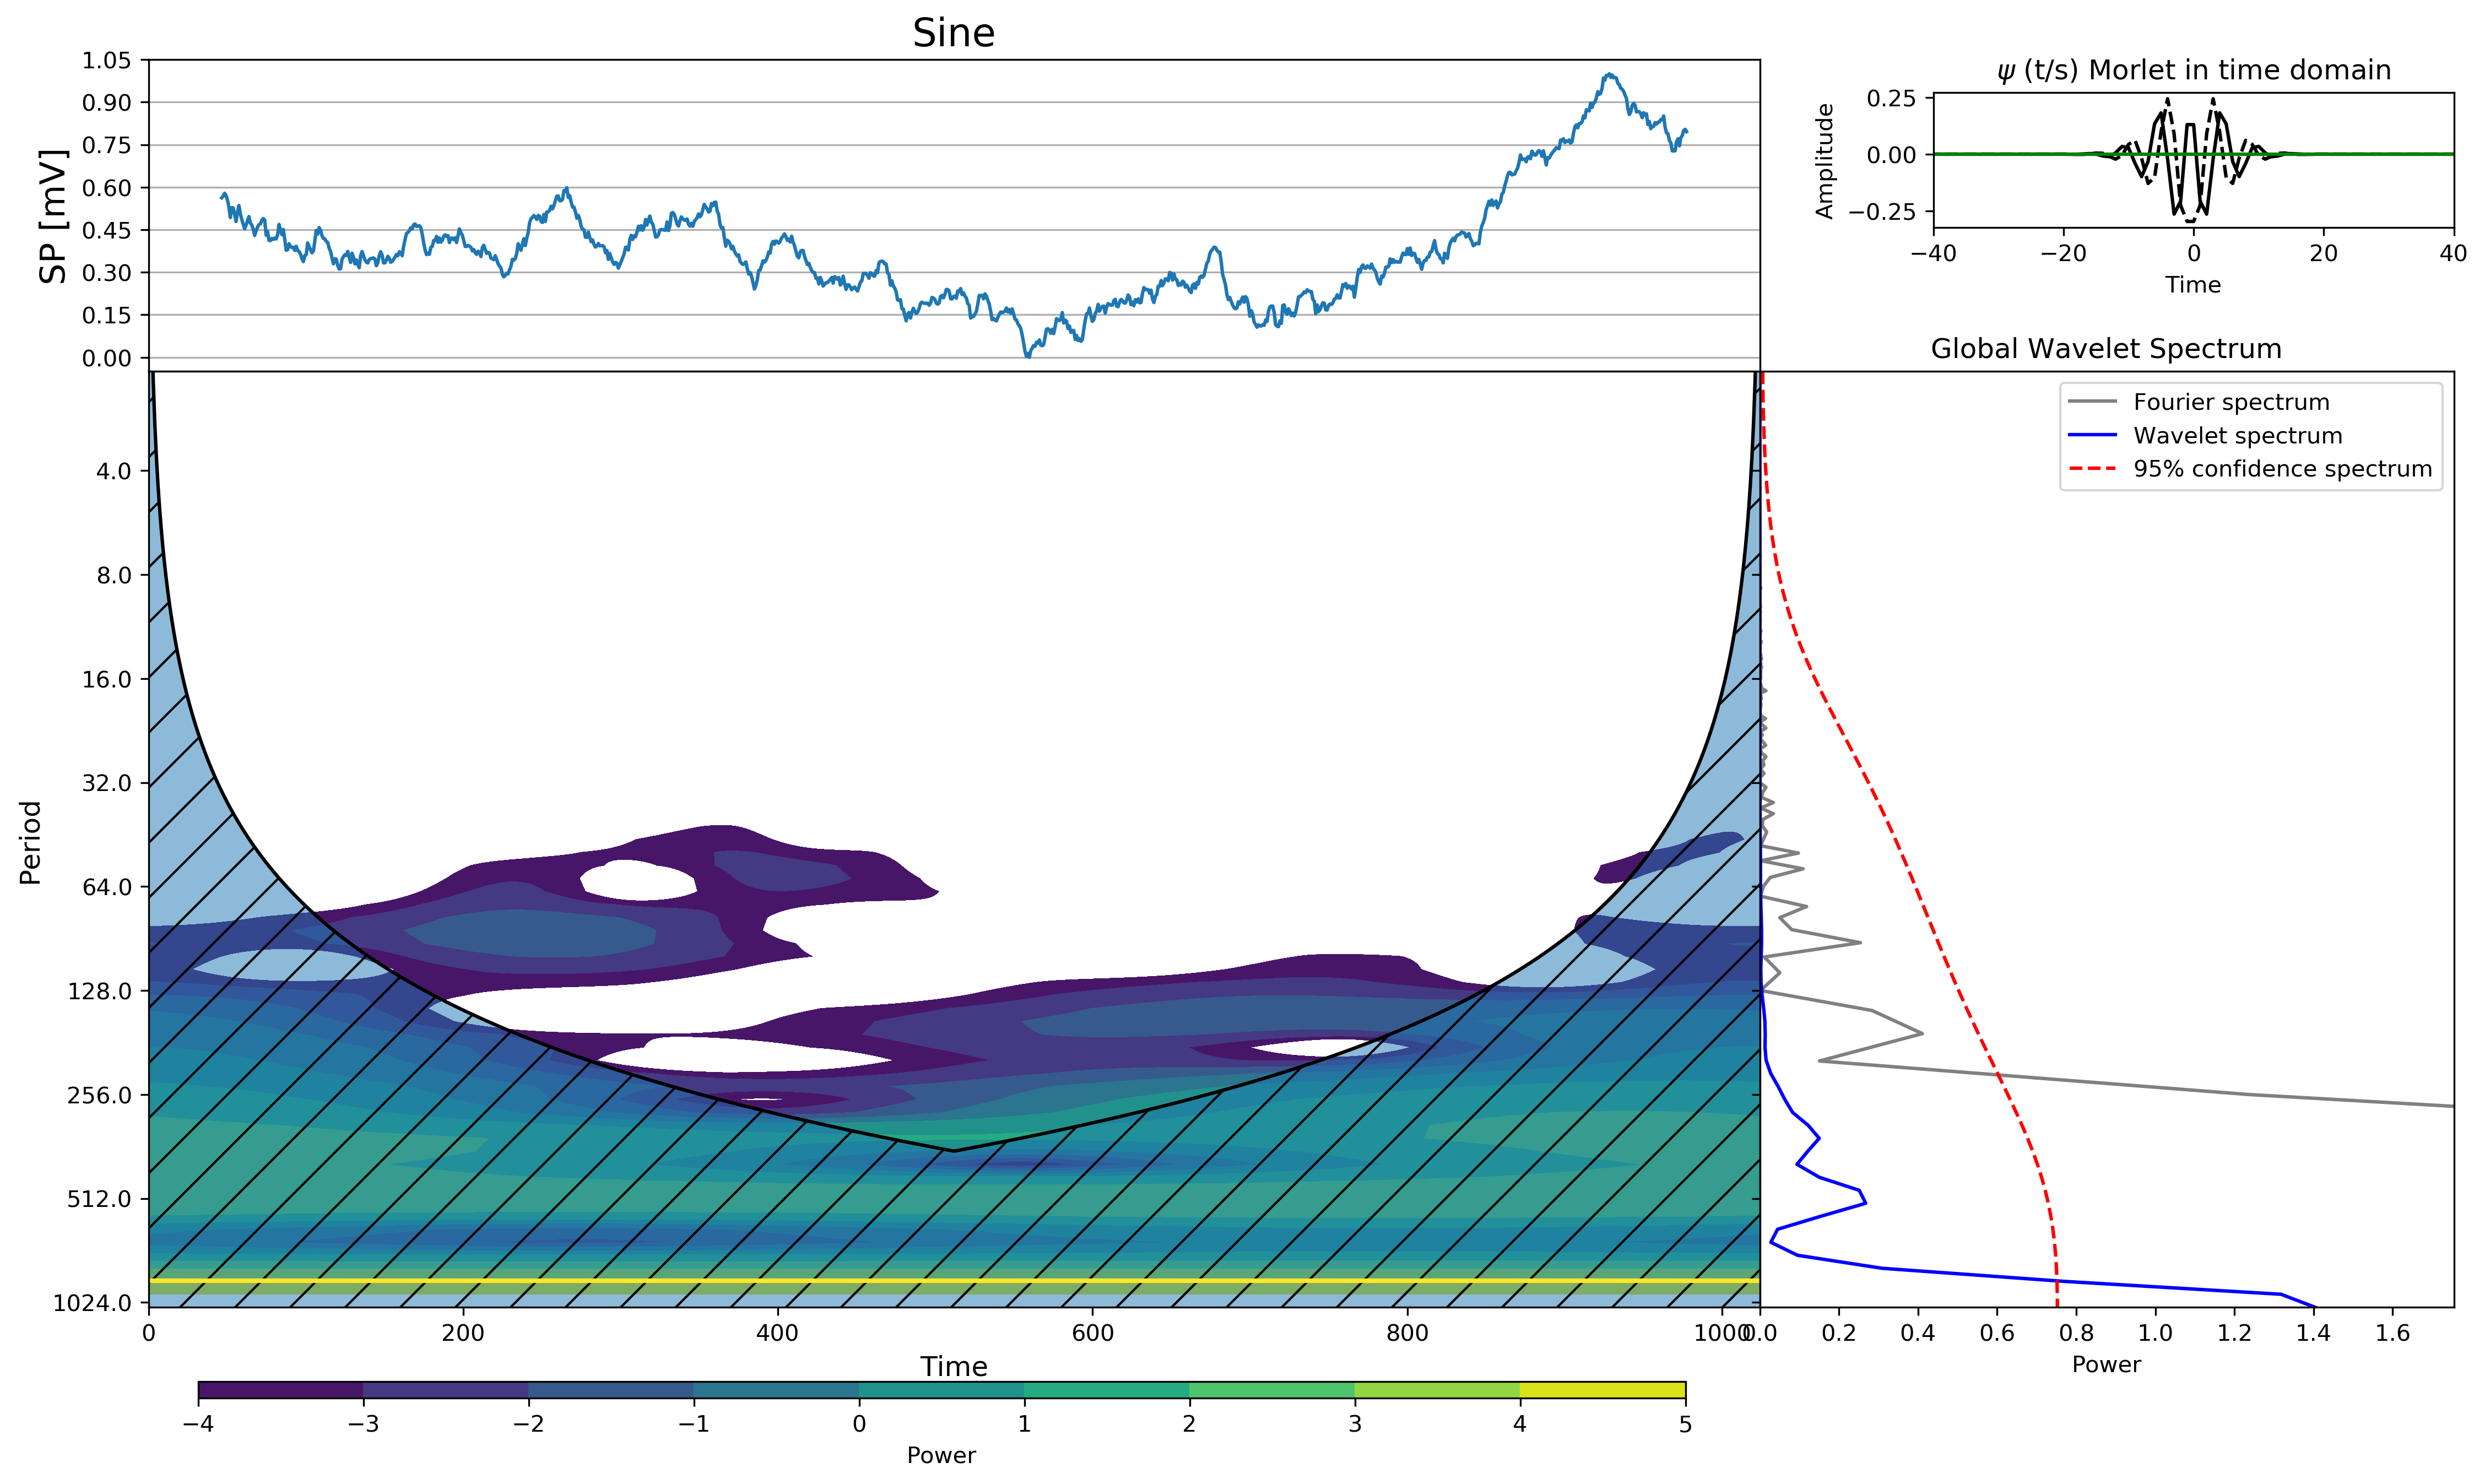

In [33]:
GWS_noise1024 = waipy.cwt(noise1024_norm[:,0], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(noise1024_norm[:,0]),len(noise1024_norm[:,0]))
waipy.wavelet_plot('Sine', z, noise1024_norm[:,0], 0.03125, GWS_noise1024)

### Noise 8192

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


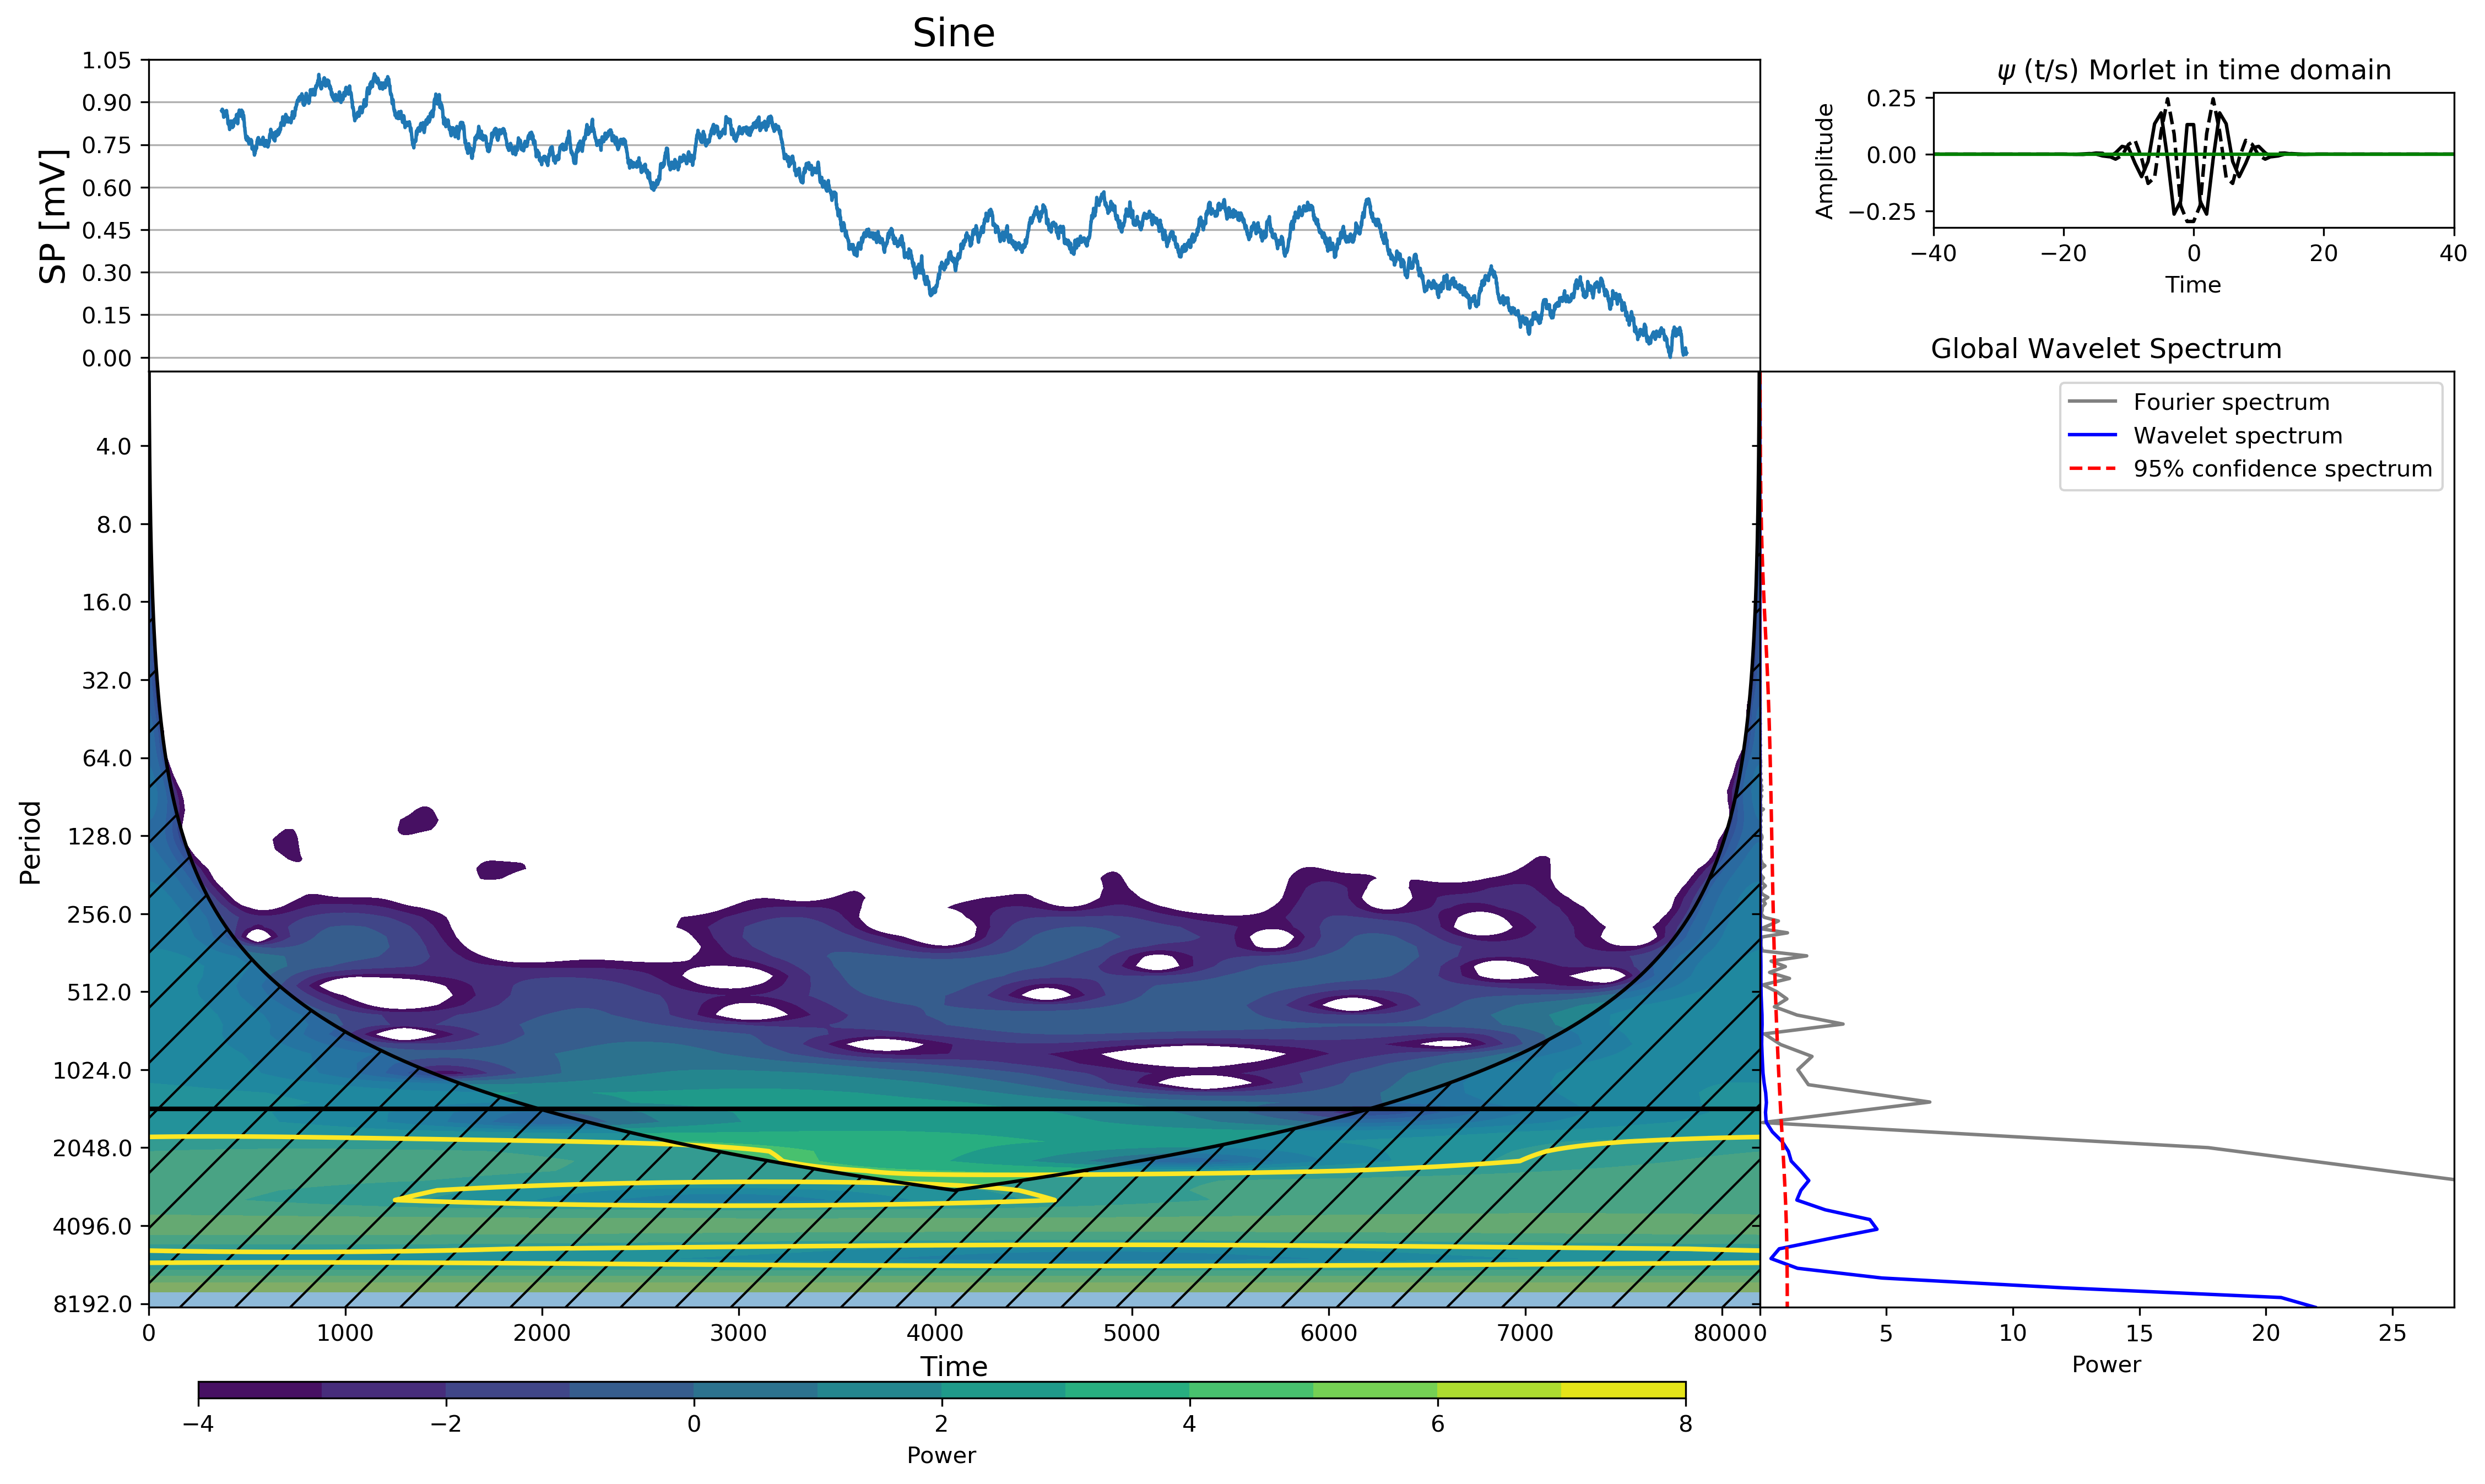

In [32]:
GWS_noise8192 = waipy.cwt(noise8192_norm[:,0], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(noise8192_norm[:,0]),len(noise8192_norm[:,0]))
waipy.wavelet_plot('Sine', z, noise8192_norm[:,0], 0.03125, GWS_noise8192)

### Color Noise White

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


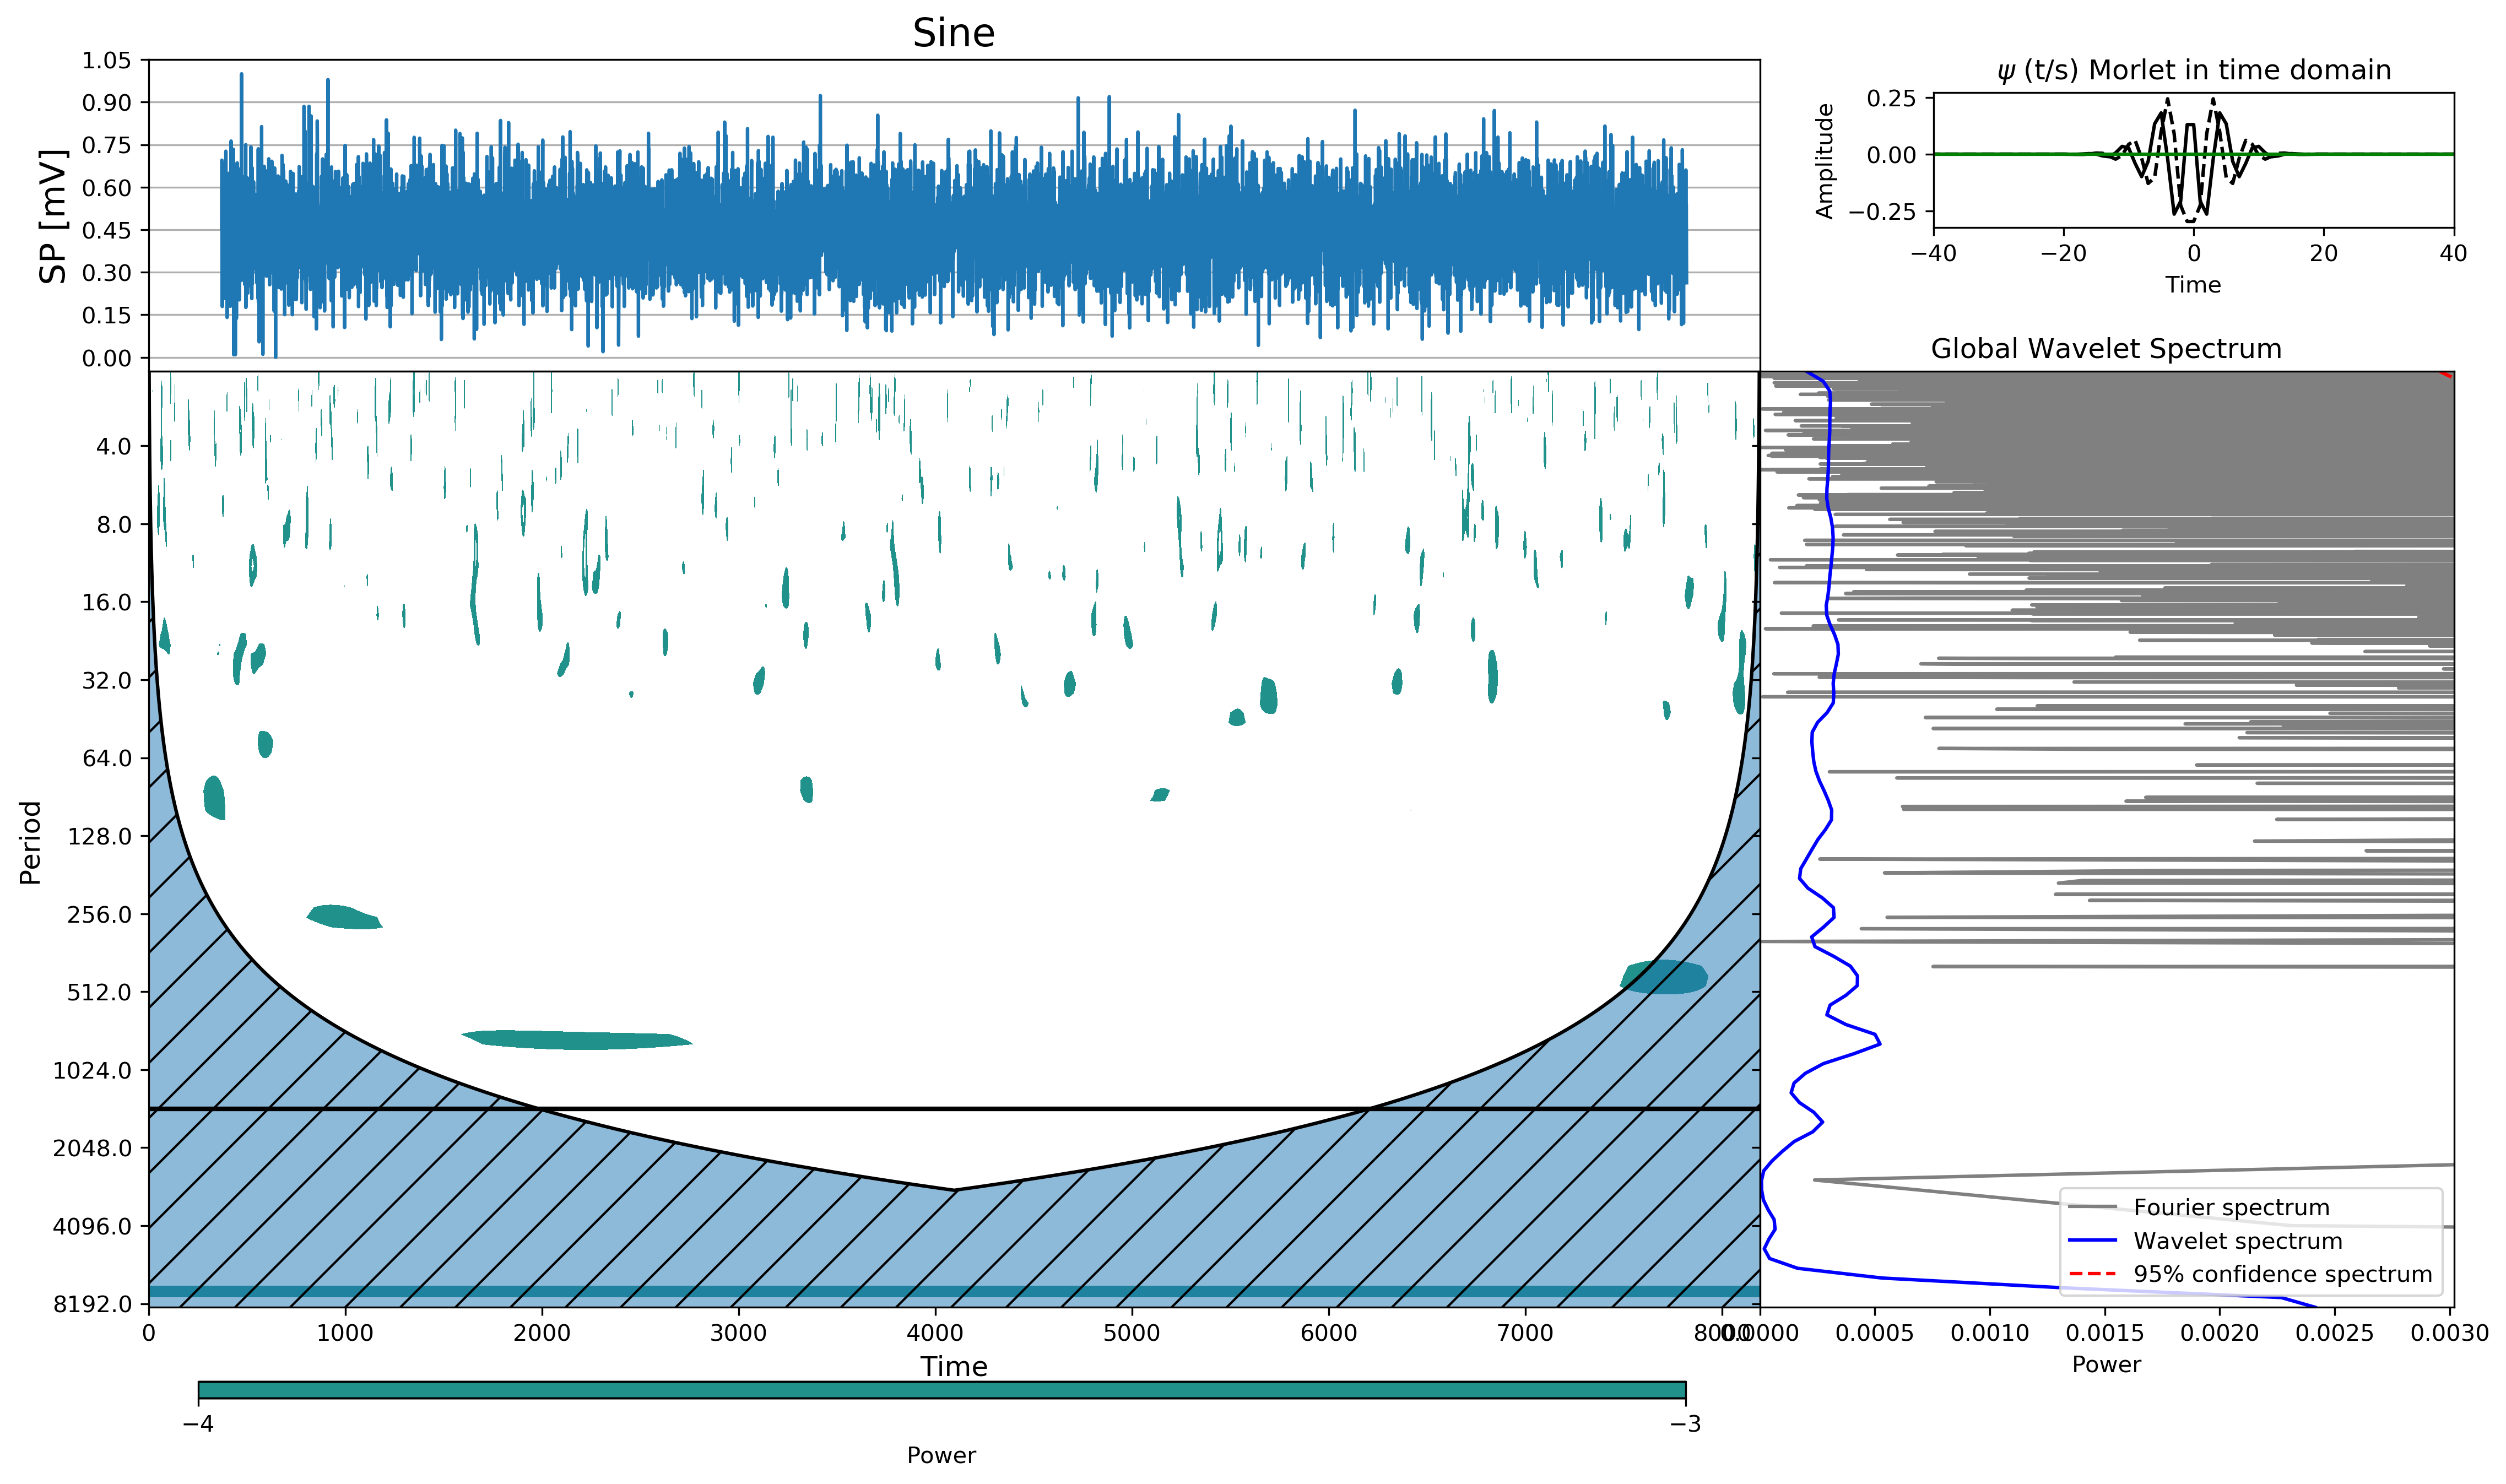

In [34]:
GWS_noisewhite = waipy.cwt(white_norm[:,0], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(white_norm[:,0]),len(white_norm[:,0]))
waipy.wavelet_plot('Sine', z, white_norm[:,0], 0.03125, GWS_noisewhite)

### Color Noise Pink

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


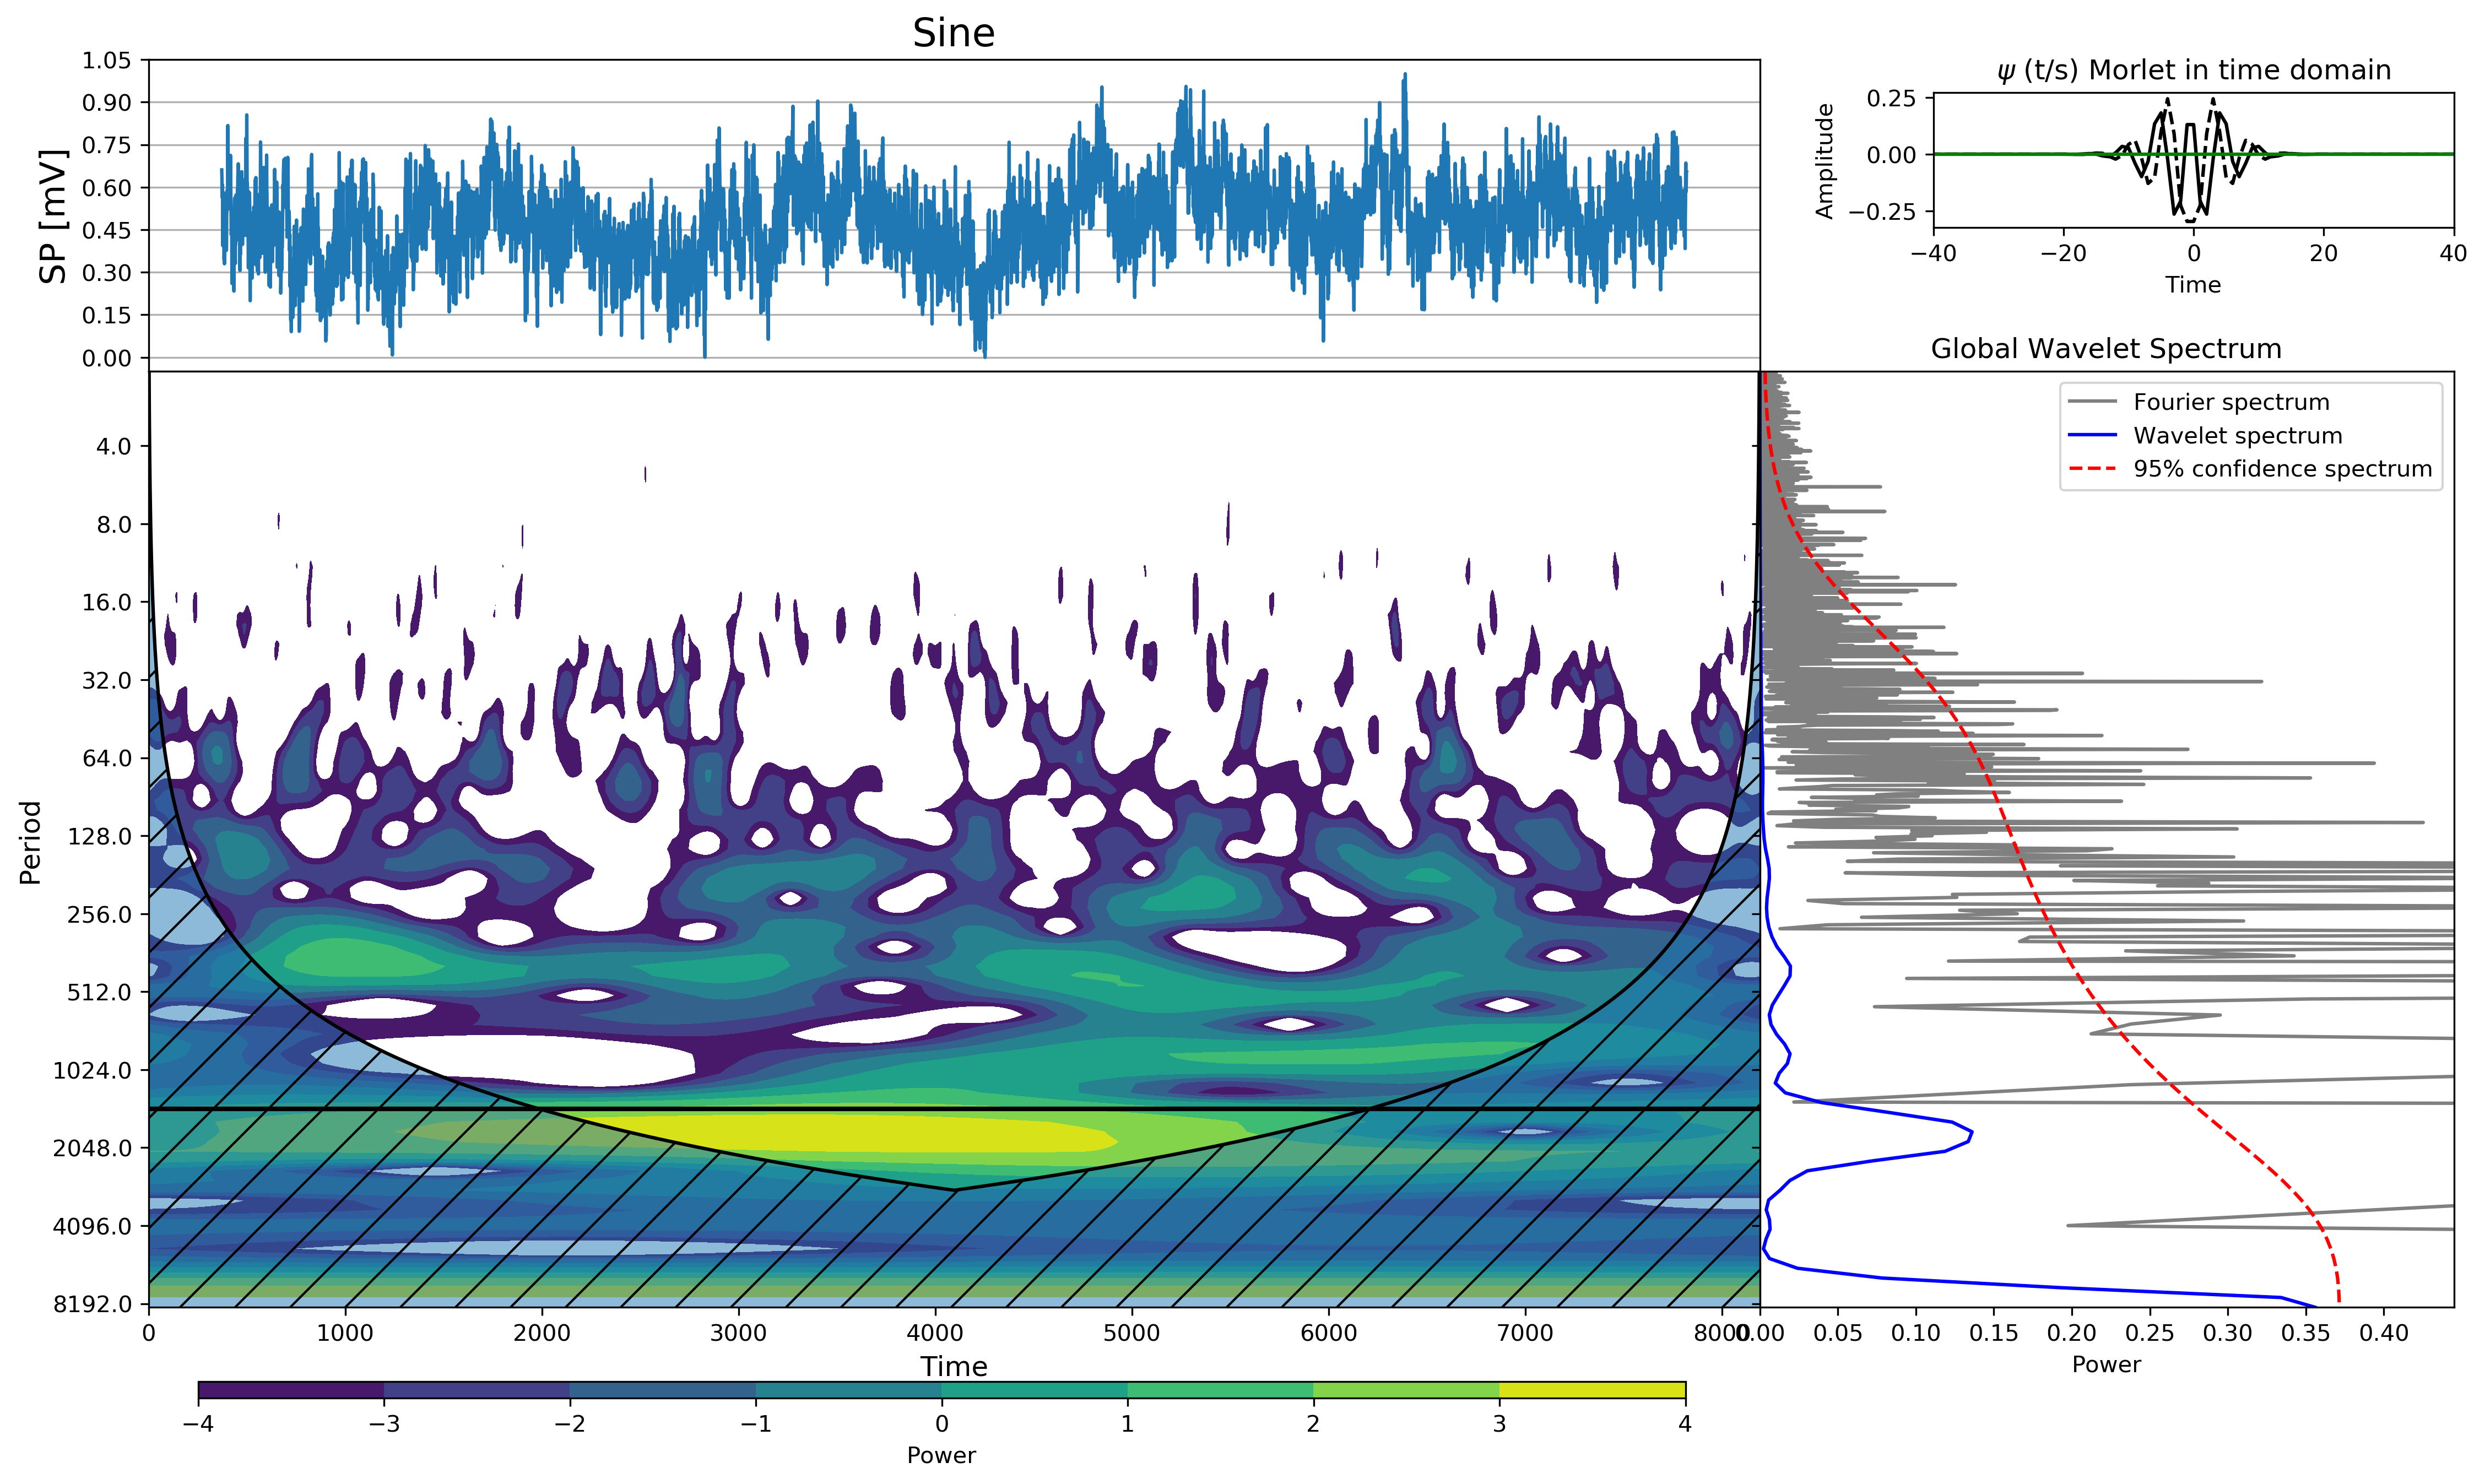

In [35]:
GWS_noisepink = waipy.cwt(pink_norm[:,0], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(pink_norm[:,0]),len(pink_norm[:,0]))
waipy.wavelet_plot('Sine', z, pink_norm[:,0], 0.03125, GWS_noisepink)

### Color Noise Red

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


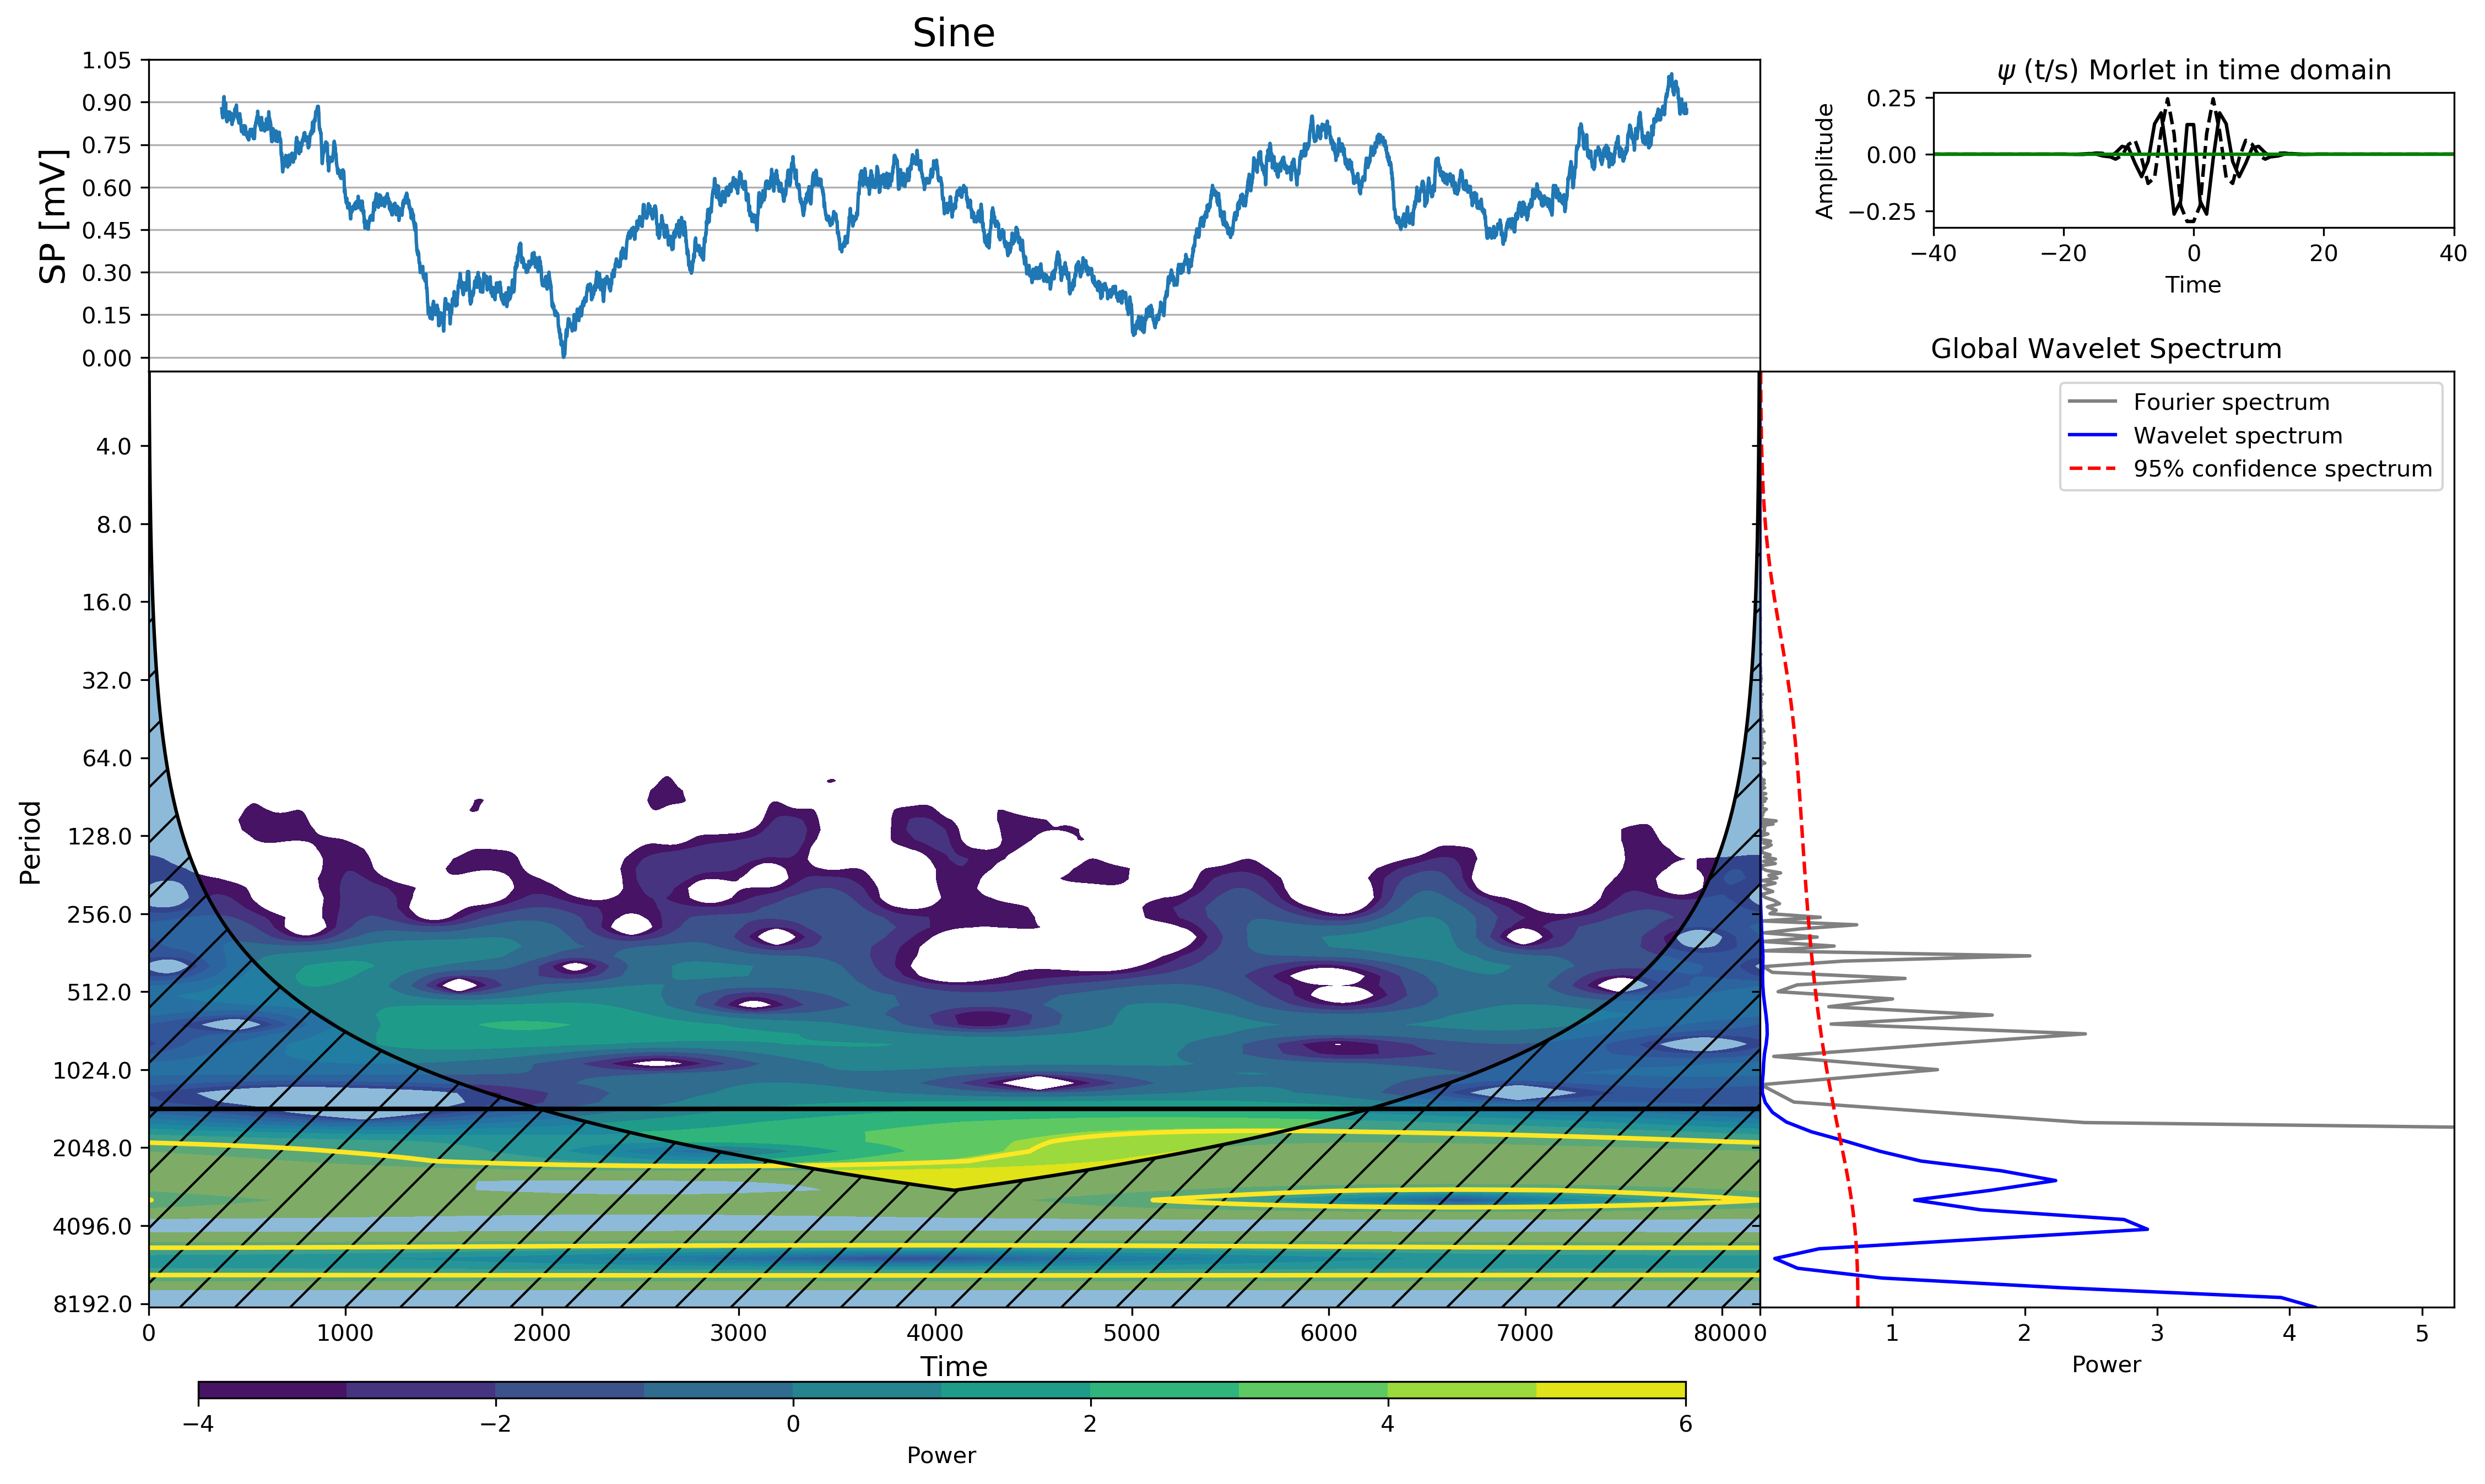

In [36]:
GWS_noisered = waipy.cwt(red_norm[:,0], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(red_norm[:,0]),len(red_norm[:,0]))
waipy.wavelet_plot('Sine', z, red_norm[:,0], 0.03125, GWS_noisered)

### Pm Noise Endogeno

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


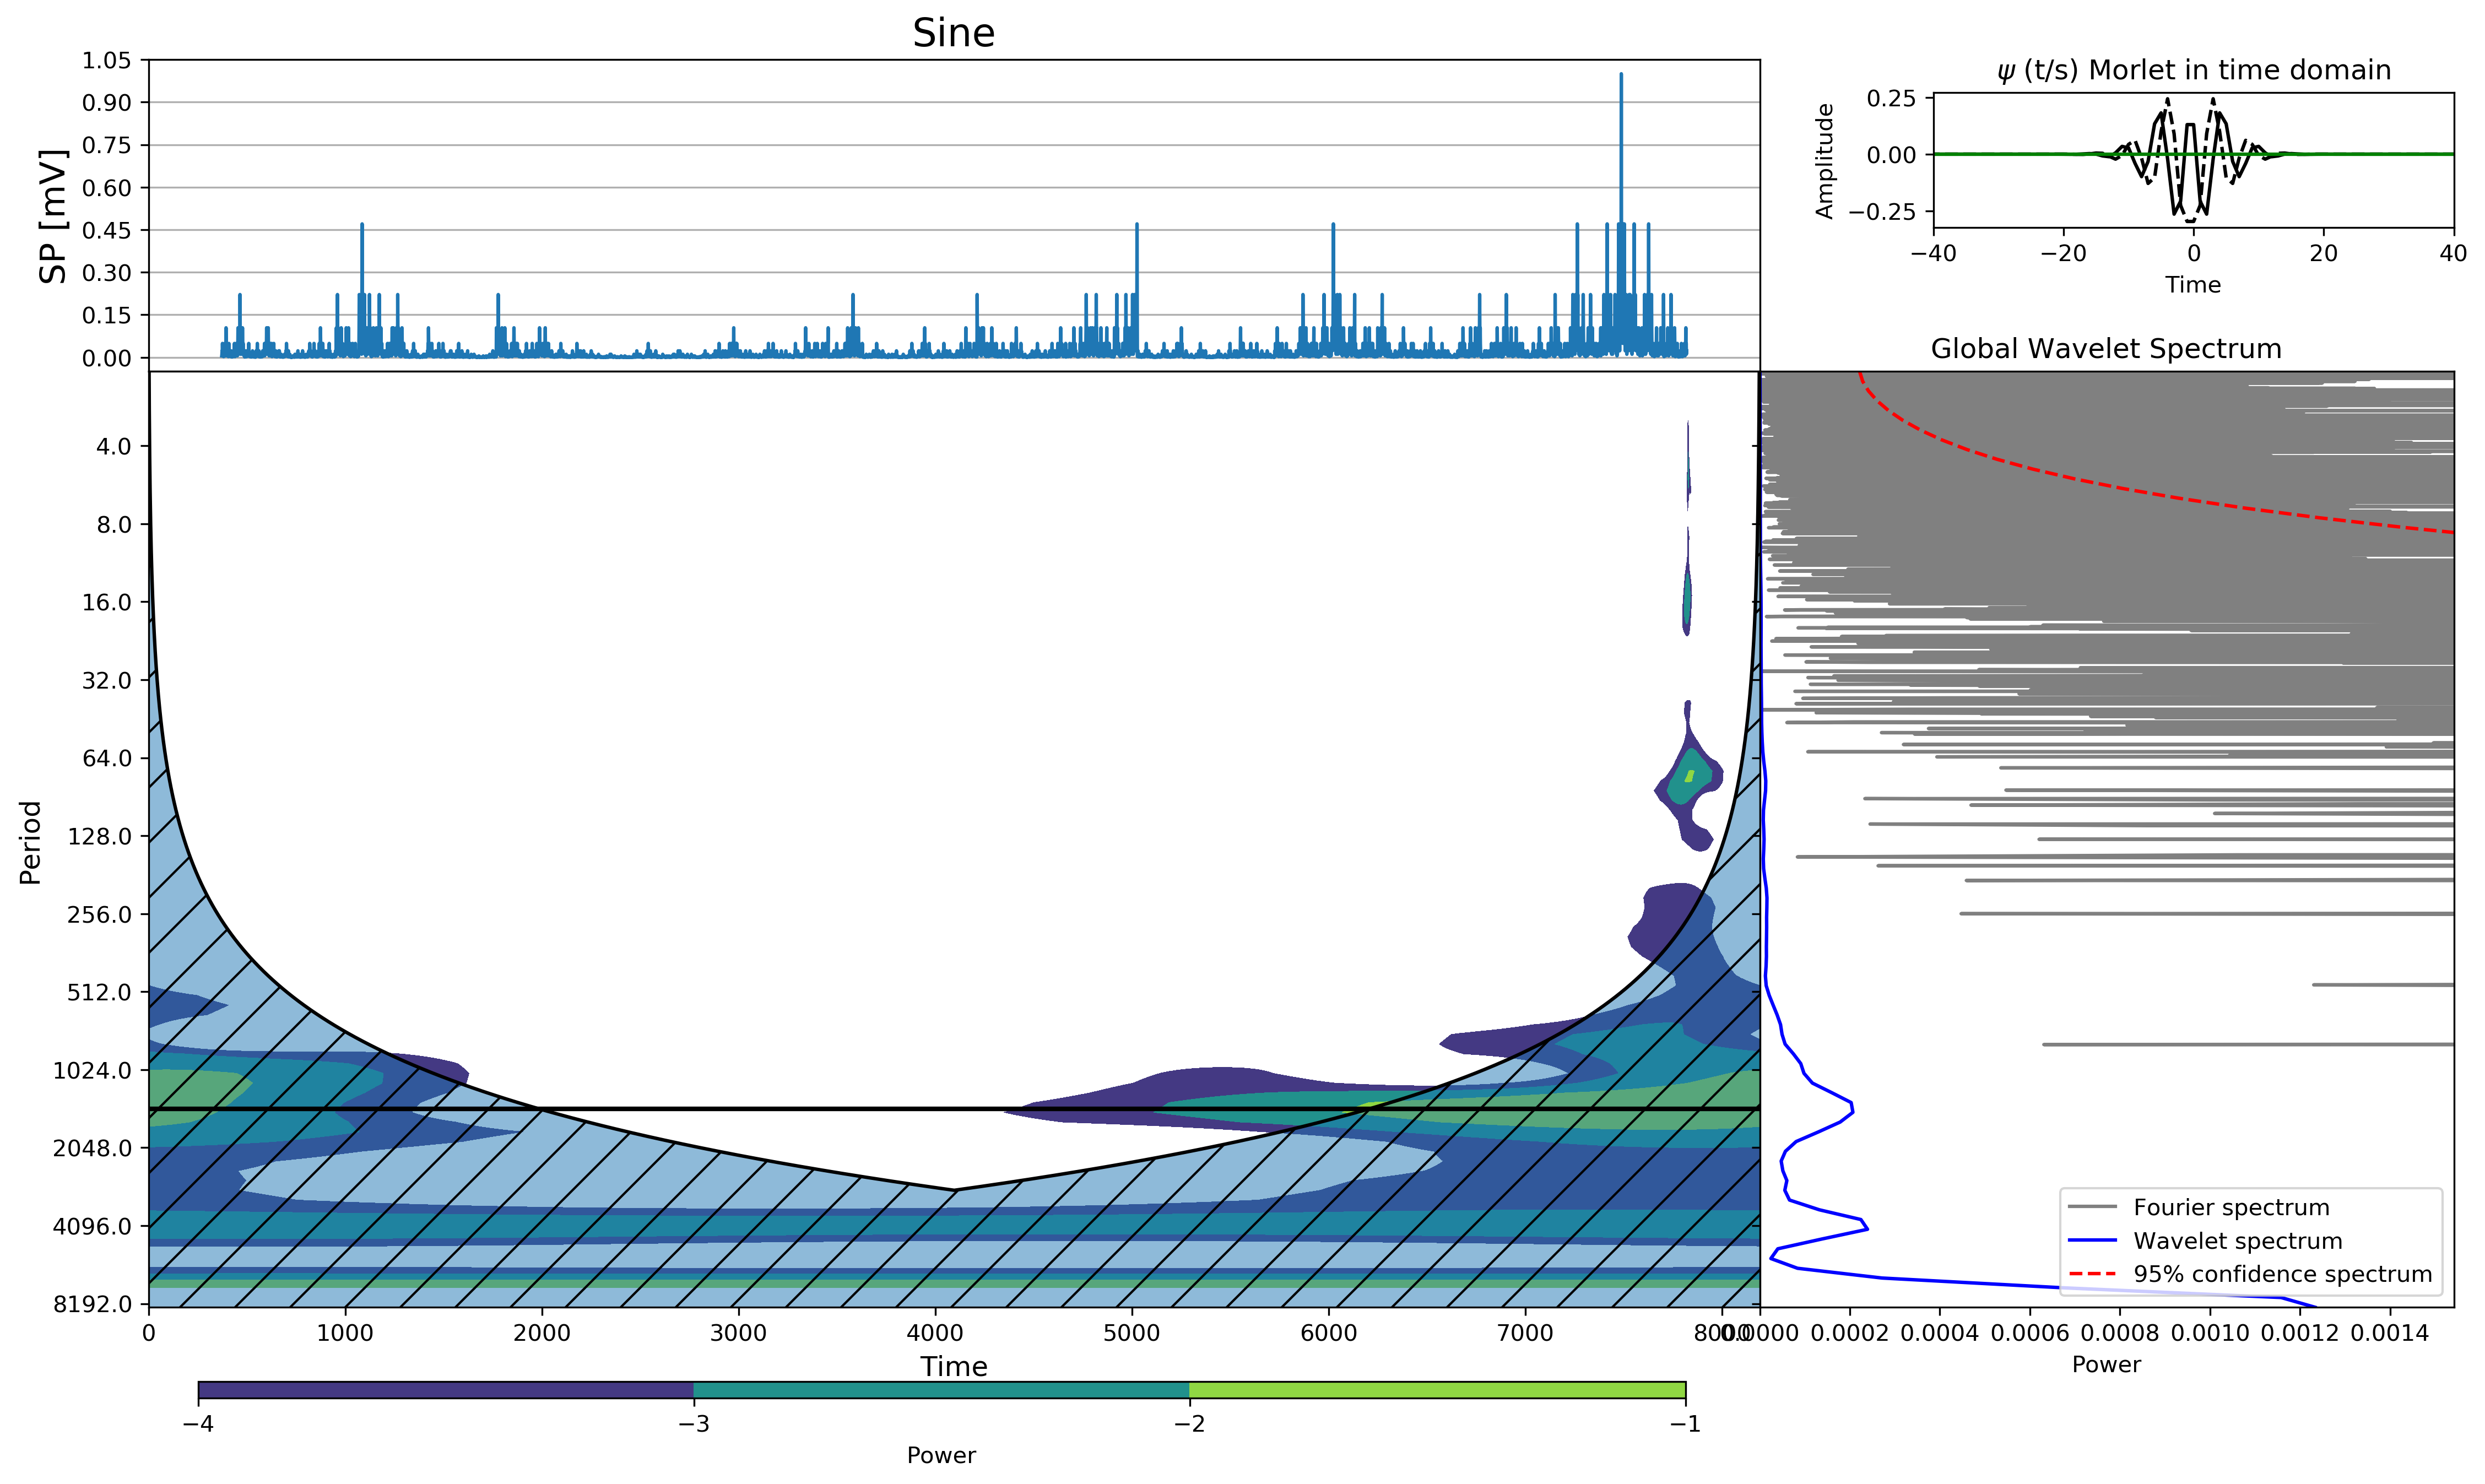

In [39]:
GWS_endogeno = waipy.cwt(endogeno1_norm[:,5], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(endogeno1_norm[:,5]),len(endogeno1_norm[:,5]))
waipy.wavelet_plot('Sine', z, endogeno1_norm[:,5], 0.03125, GWS_endogeno)

### Pm Noise Exogeno

4096 4096


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


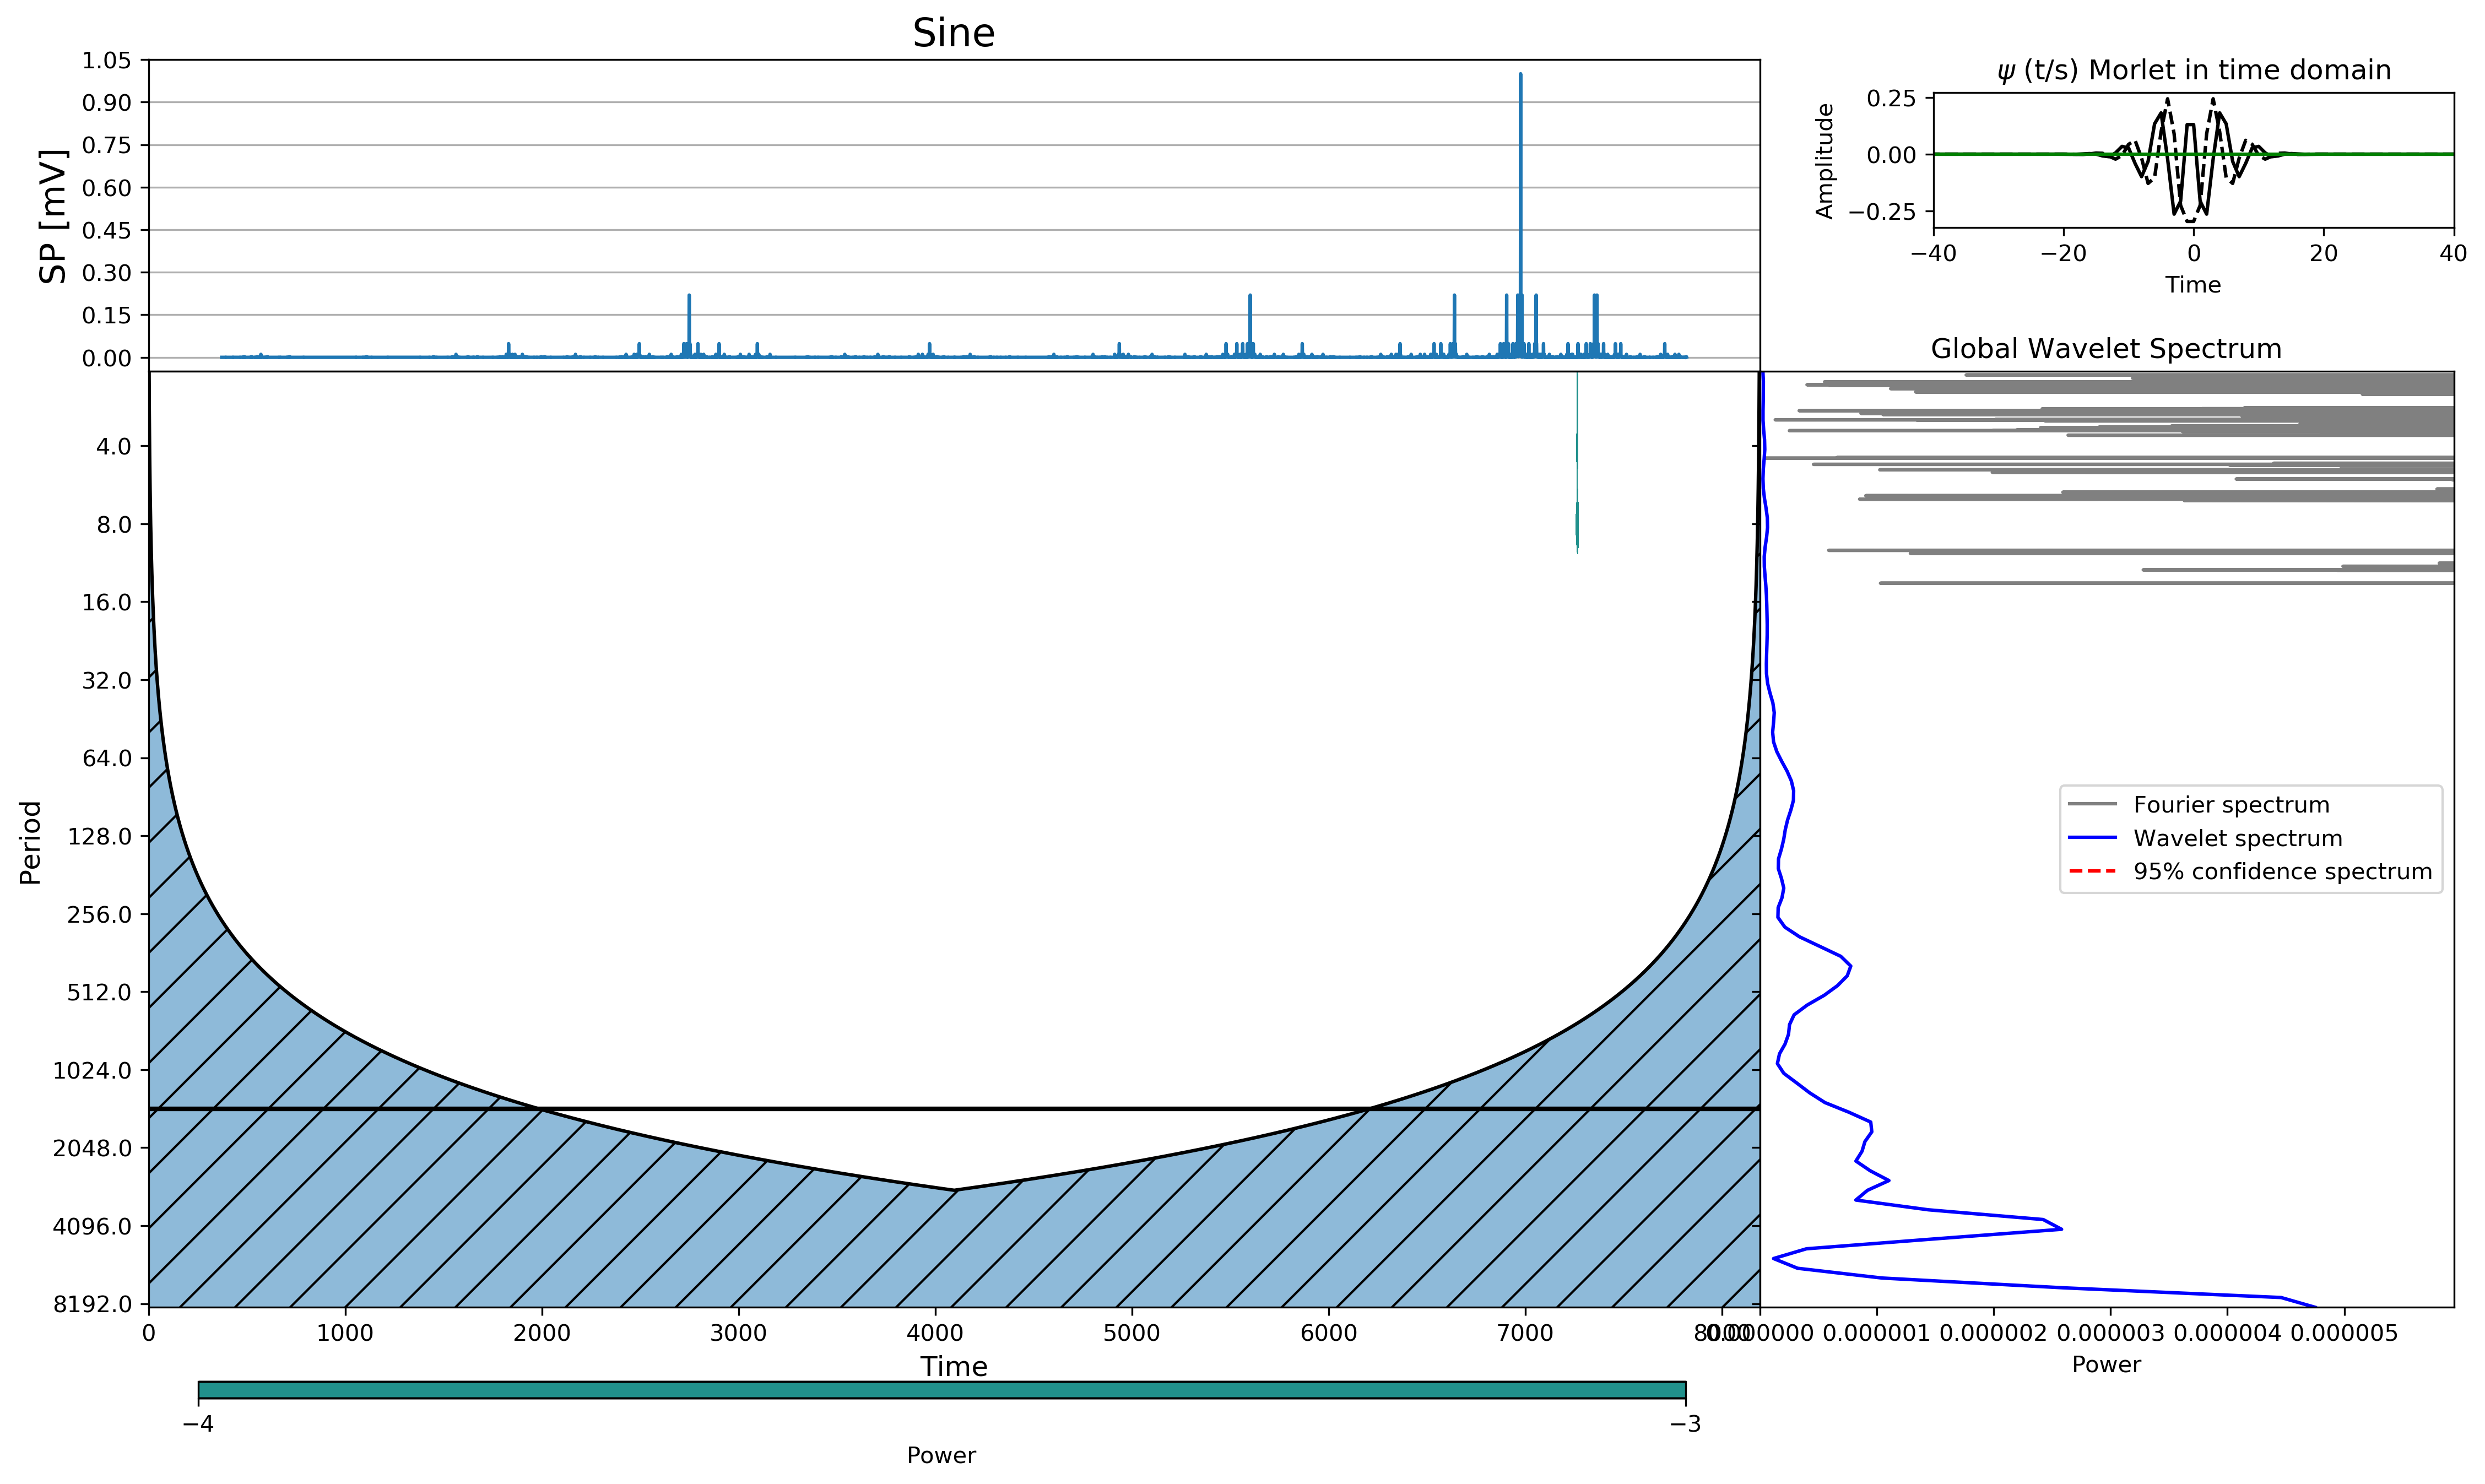

In [40]:
GWS_exogeno = waipy.cwt(exogeno1_norm[:,5], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(exogeno1_norm[:,5]),len(exogeno1_norm[:,5]))
waipy.wavelet_plot('Sine', z, exogeno1_norm[:,5], 0.03125, GWS_exogeno)

### Chaos Noise

256 256


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


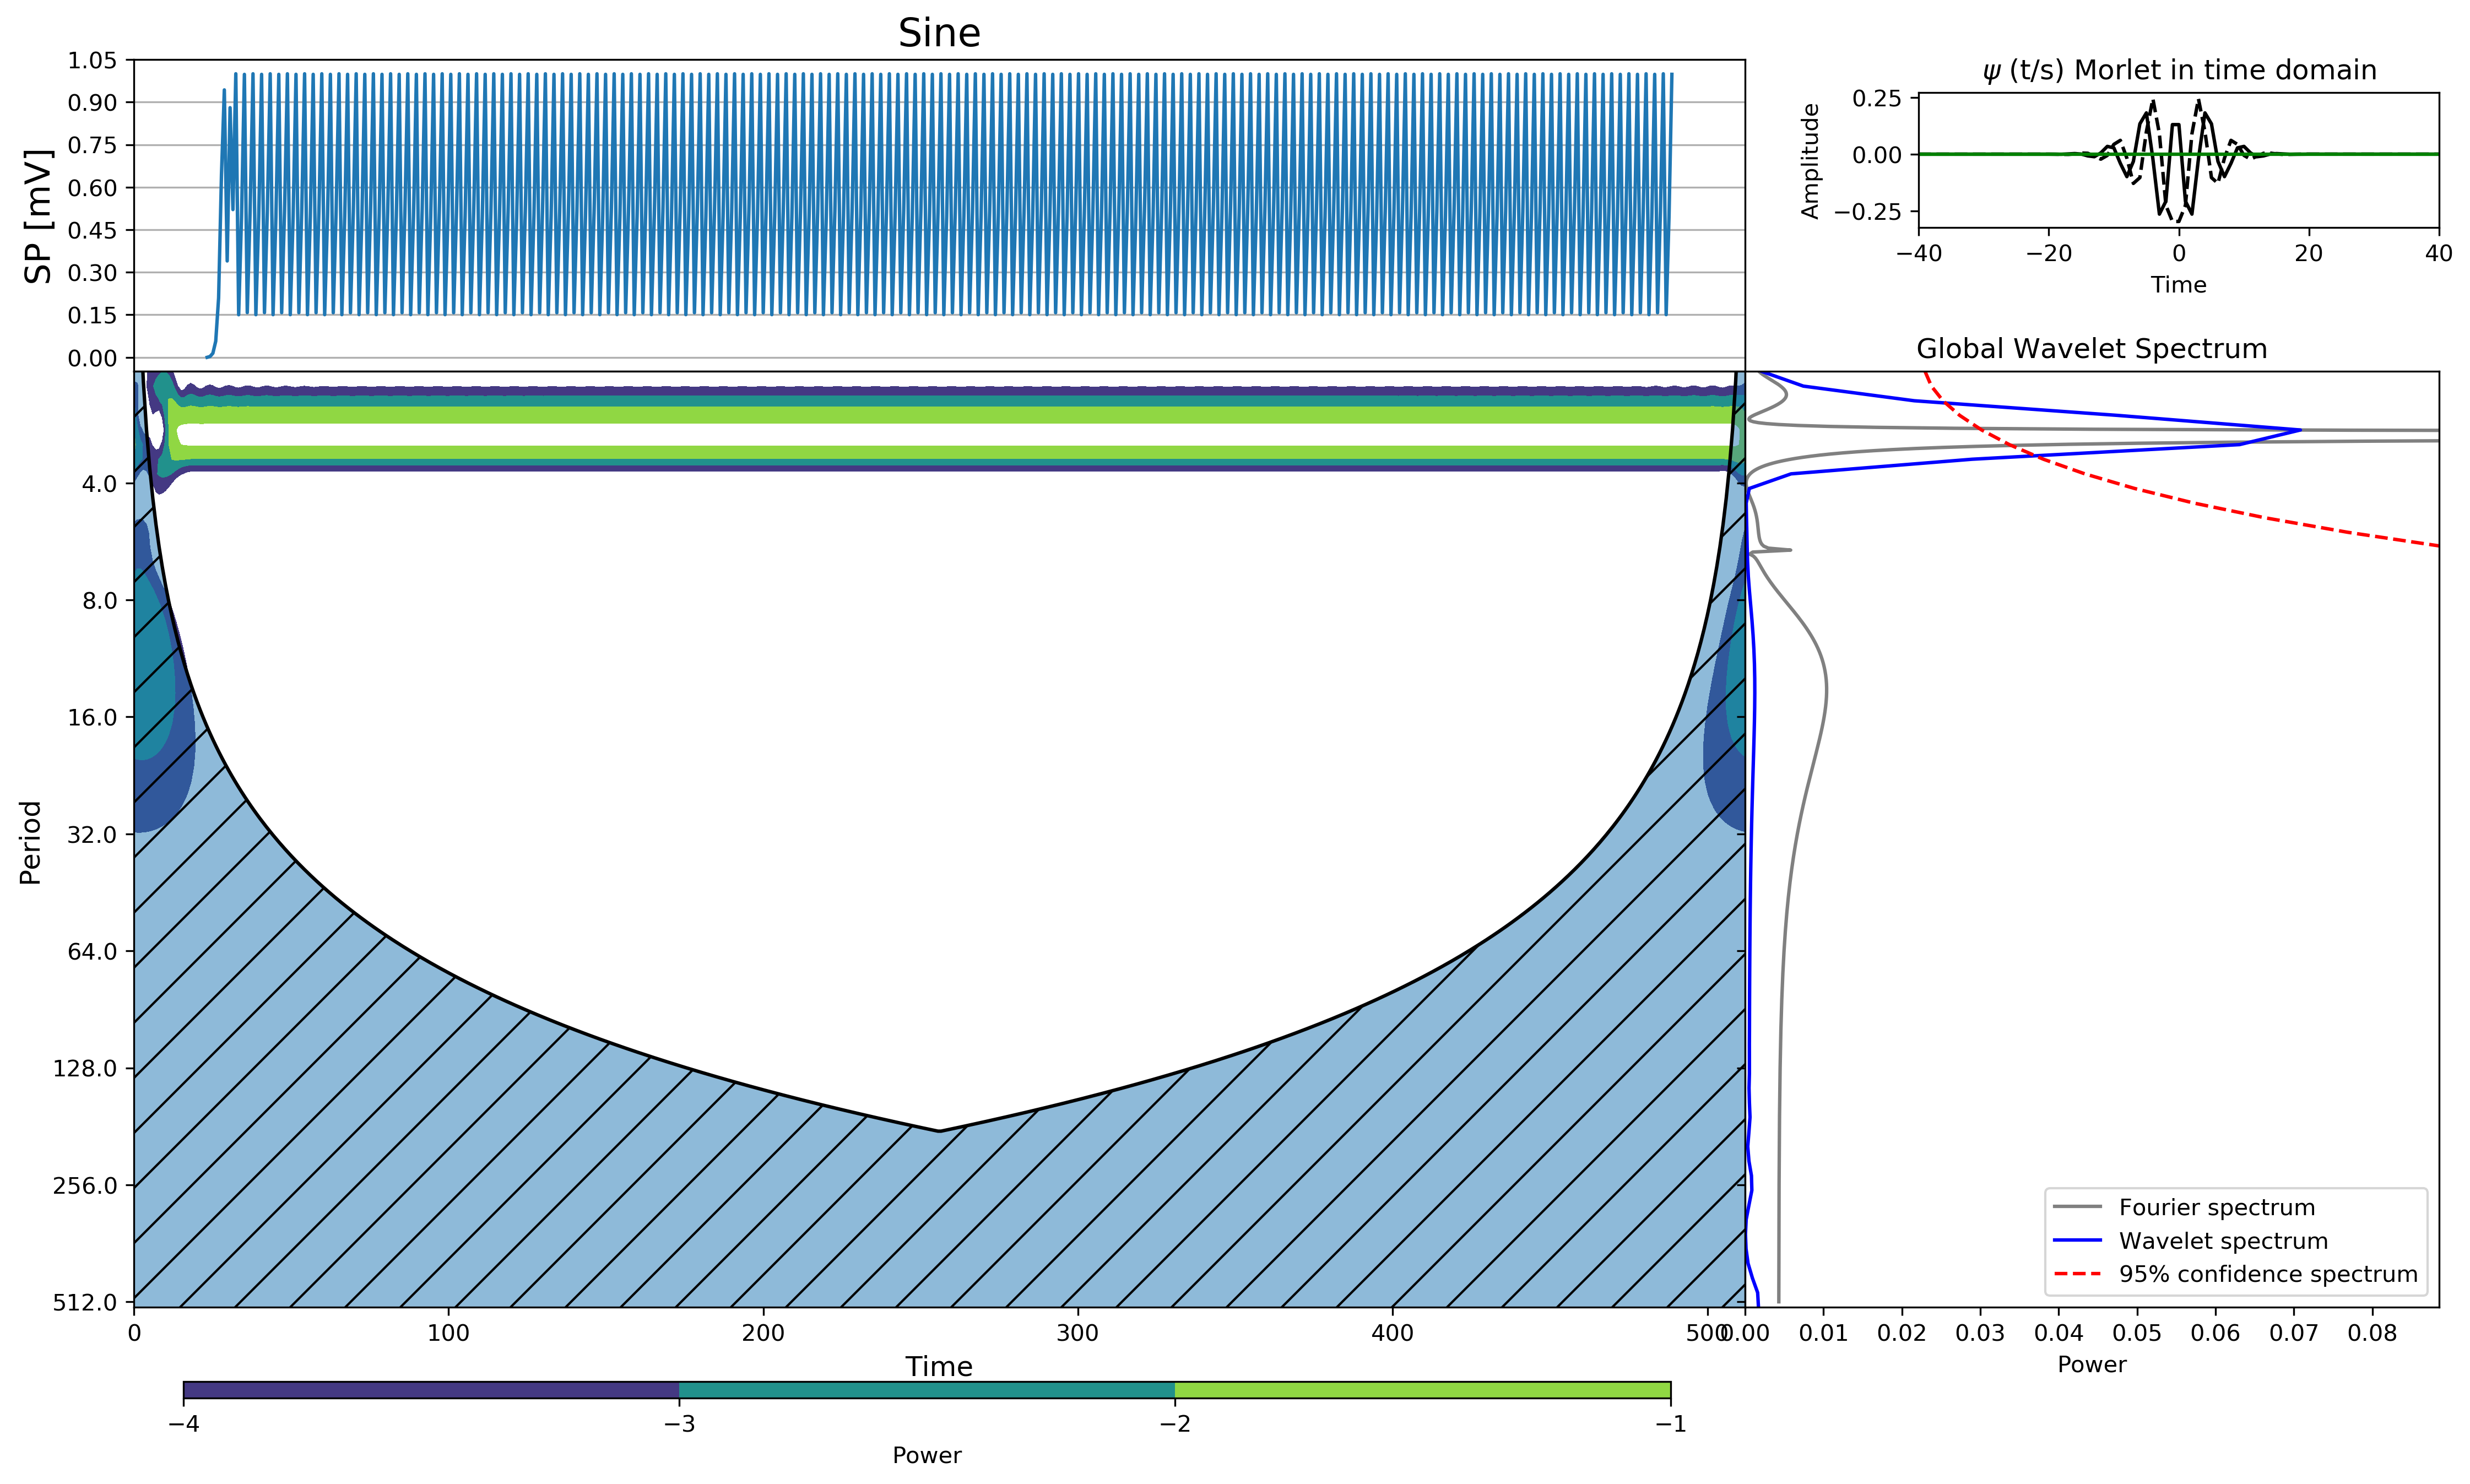

In [41]:
GWS_logisitca = waipy.cwt(logistica_norm[:,5], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(logistica_norm[:,5]),len(logistica_norm[:,5]))
waipy.wavelet_plot('Sine', z, logistica_norm[:,5], 0.03125, GWS_logisitca)

256 256


/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/arturo/anaconda3/envs/AXE/lib/python3.8/site-packages/waipy-0.0.1.40-py3.8.egg/waipy/cwt/wavetest.py:522: UserWarning: No contour levels were found within the data range.
  pc2 = ax2.contour(time, np.log2(result['period']), result['sig95'],[-99, 1], linewidths=2)


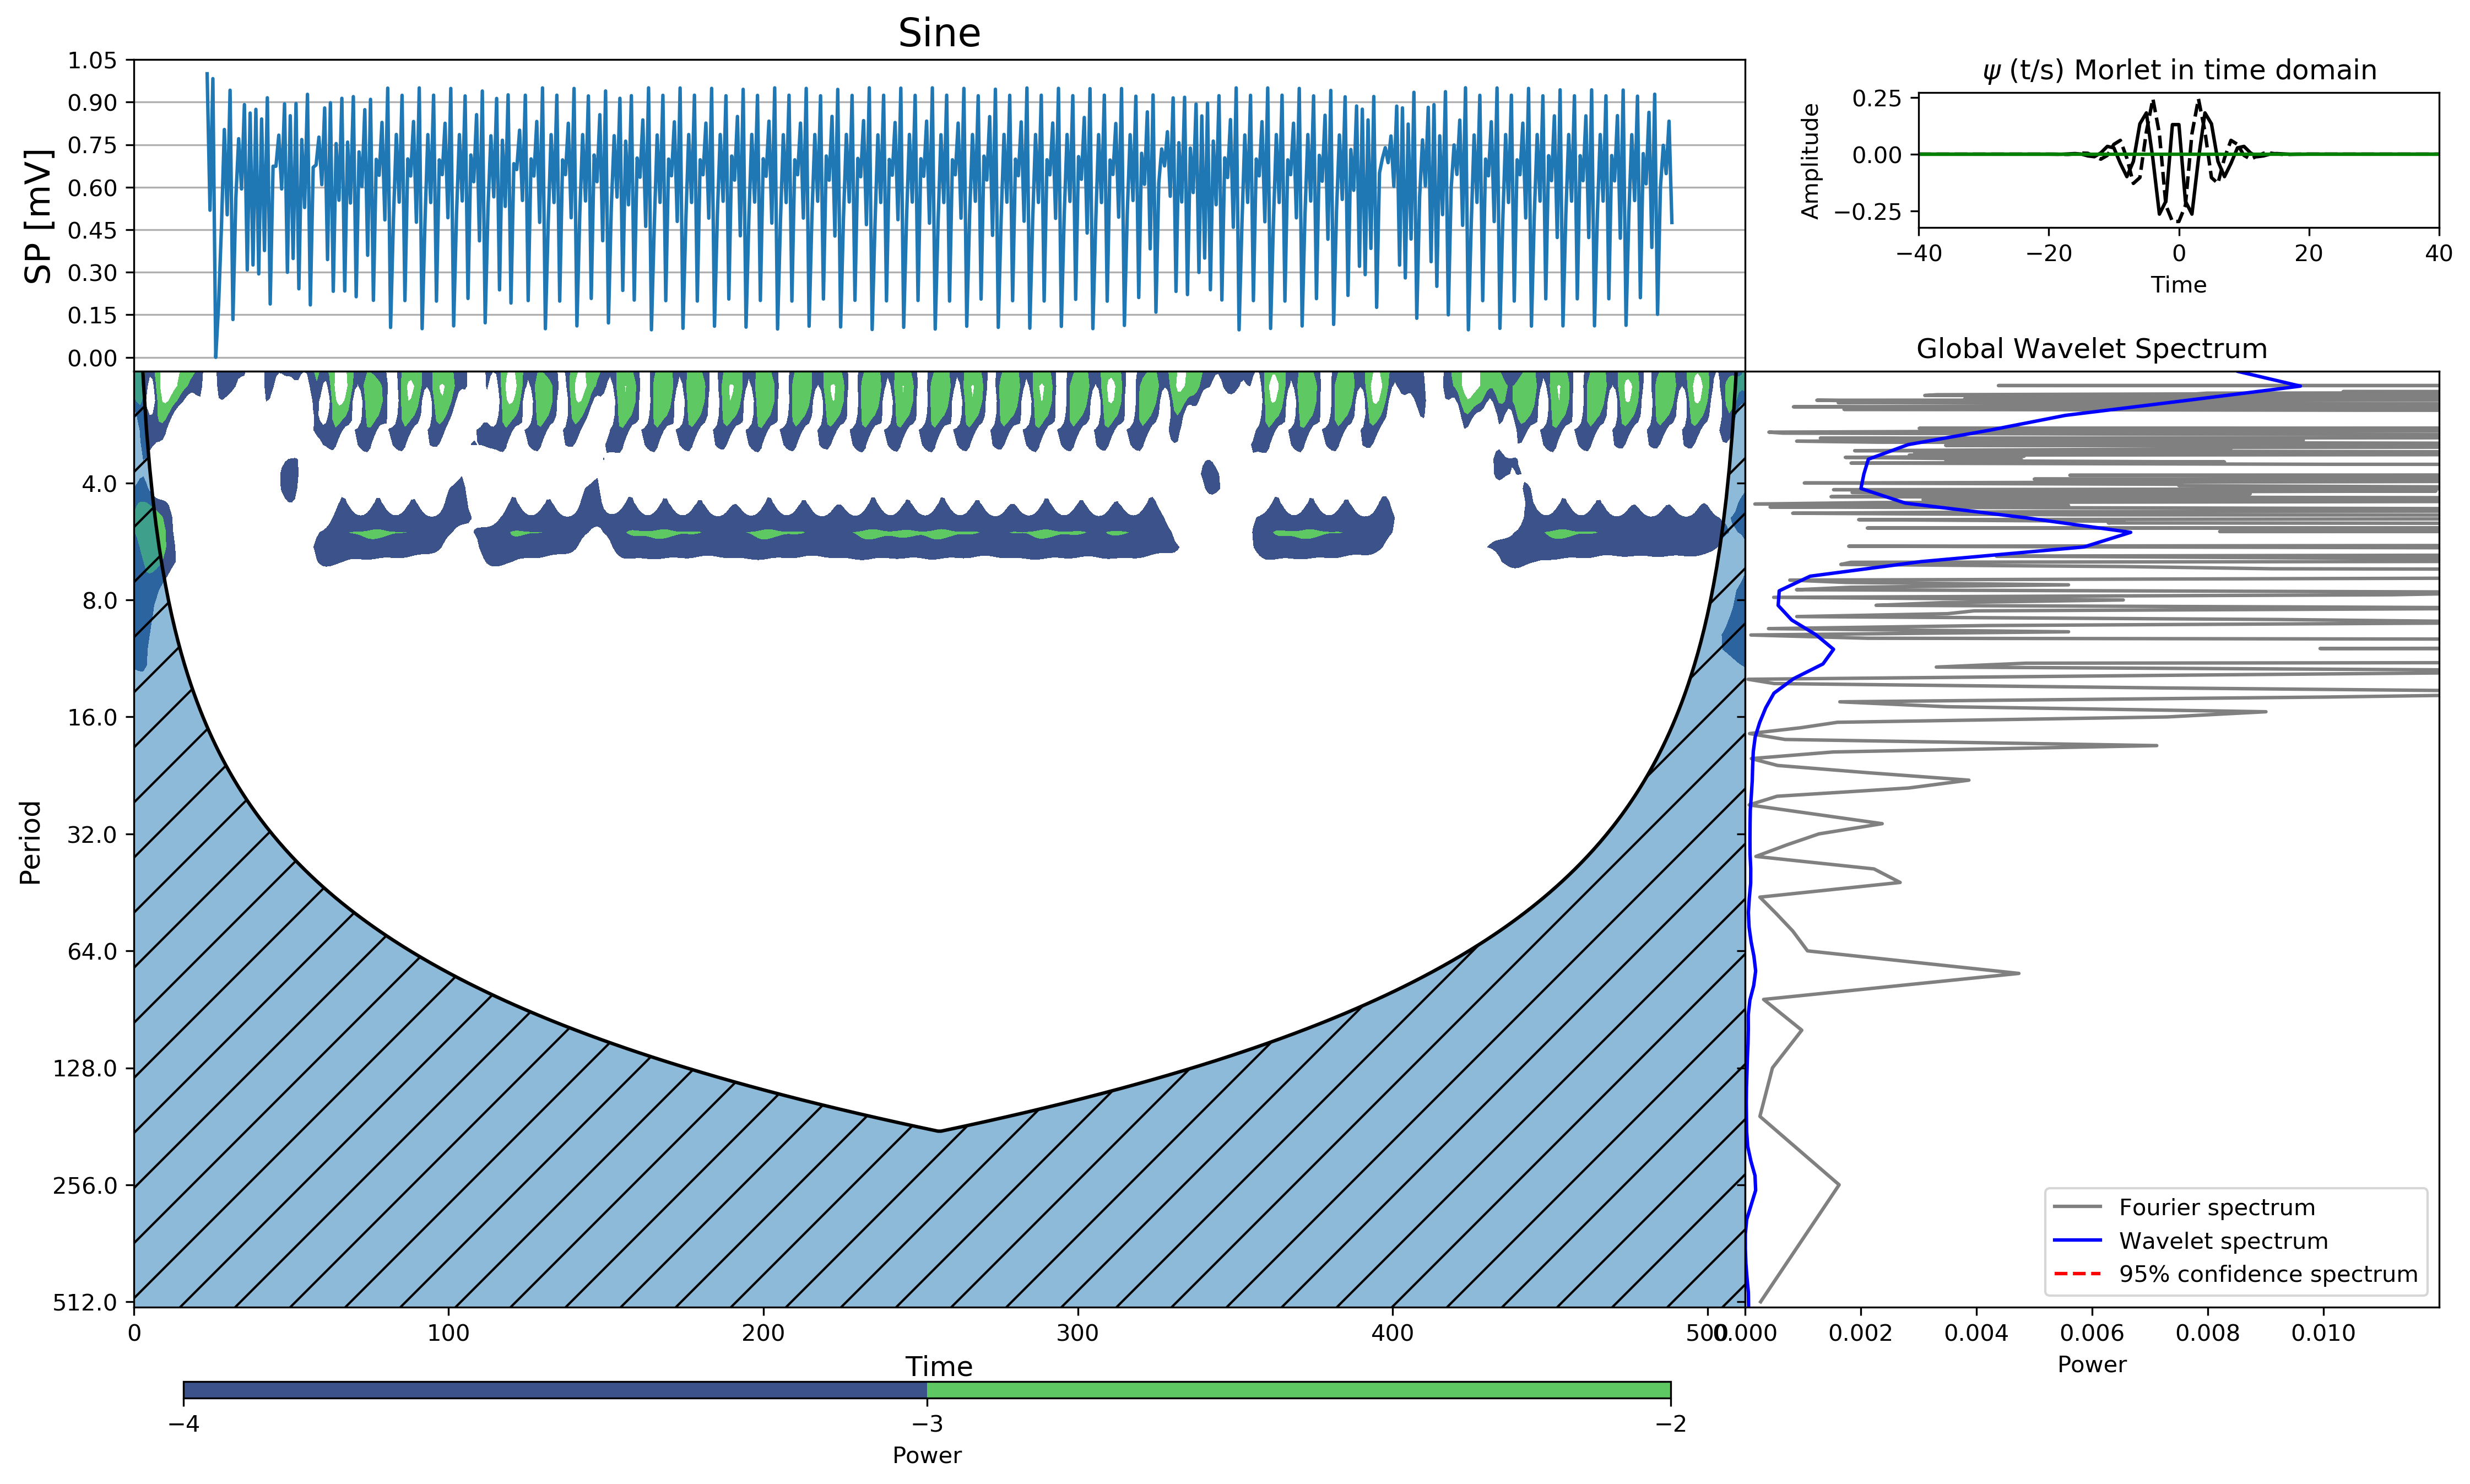

In [42]:
GWS_logisitca = waipy.cwt(henon_norm[:,5], 1, 1, 0.125, 2, 4/0.125, 0.72, 6, mother='Morlet',name='x')
z = np.linspace(0,len(henon_norm[:,5]),len(henon_norm[:,5]))
waipy.wavelet_plot('Sine', z, henon_norm[:,5], 0.03125, GWS_logisitca)